**Problem Statement:**

Perform a simple experiment following the instructions below: 

1. Do some data manipulation and visualization on the customer churn dataset 

2. Build a simple and multiple logistic regression models




In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()

'c:\\Users\\olato\\machine-learning-intro\\notebooks'

In [9]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")


Import dataset

In [10]:
df  = pd.read_csv(".\data\customer-churn.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\olato\AppData\Local\Temp\ipykernel_28044\630696773.py:1: SyntaxWarning: invalid escape sequence '\d'
  df  = pd.read_csv(".\data\customer-churn.csv")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [49]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [52]:
df.duplicated().sum()

np.int64(0)

Data manipulation

In [11]:
# print the first 5 columns and rows
print(df.head().to_string())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes  

In [13]:
# Extract the 5th column and store it in customer_5 and show column name
customer_5 = df.iloc[:, 4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [20]:
# Extract the 15th column and store it in customer_15
customer_15 = df.iloc[:, 14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

**Extract all the male senior citizen whose payments method is electronic check and store the result in 'senior_male_experience'.**

In [15]:
senior_male_experience = df[(df["SeniorCitizen"] == 1) & (df["gender"] == "Male") & (df["PaymentMethod"] == "Electronic check")]
senior_male_experience

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


**Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in 'customer_total_tenure'.**


In [19]:
customer_total_tenure = df[(df["tenure"] > 70) | (df["MonthlyCharges"] > 100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


**Extract all the customers whose contact is of two years, payment method is mailed check and the value of churn is 'yes' and store the result in 'two_mail_ways'**


In [16]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [17]:
two_mail_ways = df[(df["Contract"] == "Two year") & (df["PaymentMethod"] == "Mailed check") & (df["Churn"] == "Yes")]
two_mail_ways

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


**Extract 333 random records from customer_churndataframe and store the result in 'customer_333'.**


In [18]:
customer_333 = df.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
619,4059-IIEBK,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),78.55,522.95,No
6032,9090-SGQXL,Male,1,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.30,7299.65,Yes
6336,8647-SDTWQ,Male,0,Yes,Yes,57,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,No
4979,9593-CVZKR,Female,0,Yes,Yes,56,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.45,1385.85,No
1515,1921-KYSAY,Female,0,No,No,41,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,Yes,Electronic check,68.60,2877.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5562,8023-QHAIO,Female,1,Yes,No,56,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),76.85,4275.75,No
224,5961-VUSRV,Female,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.35,219.35,No
5976,6907-CQGPN,Male,0,No,No,29,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,34.30,1004.75,No
4257,9732-EQMWY,Female,0,Yes,No,49,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,99.40,5025,No


**Get the count of different levels from the churn column.**

In [19]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

**Data Visualization**


Build a bar plot from the 'InternetService' Column:


a. Set x-axis label to 'Categories to internet service'


b. Set y-axis label to 'Count to categories'


c. Set the title of plot to 'Distribution of internet service'


d. Set the color of bars to be orange

In [21]:
Is_count = df["InternetService"].value_counts()
Is_count

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [22]:
x = Is_count.index
x

Index(['Fiber optic', 'DSL', 'No'], dtype='object', name='InternetService')

In [23]:
y = Is_count.values
y

array([3096, 2421, 1526])

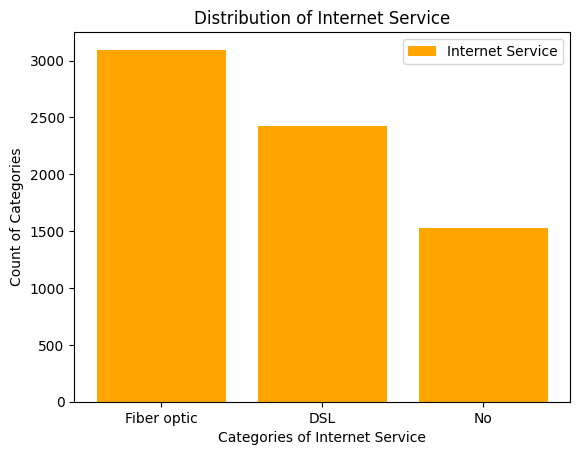

In [24]:
plt.bar(x, y, color= "orange", label = "Internet Service")
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")
plt.legend()
plt.show()


**Build a histogram for the 'tenure' colum:**


a. Set the number of bins to be 30


b. Set the color of the bins to be 'green'


c. Assign the title 'Distribution of tenure'

In [25]:
tenure_counts = df["tenure"].value_counts()
tenure_counts

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

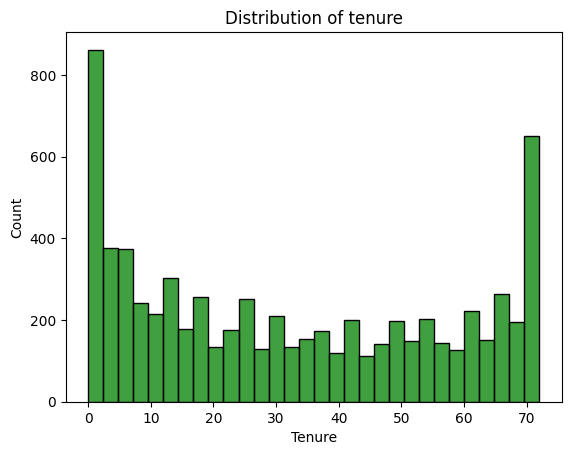

In [28]:
sns.histplot(df["tenure"], bins = 30, color = "green")
plt.title("Distribution of tenure")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.show()

**Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:**

a. Assign the points a color of ‘brown’

b. Set the x-axis label to ‘Tenure of customer’

c. Set the y-axis label to ‘Monthly Charges of customer’

d. Set the title to ‘Tenure vs Monthly Charges’



Text(0.5, 1.0, 'Tenure vs Monthly Charges')

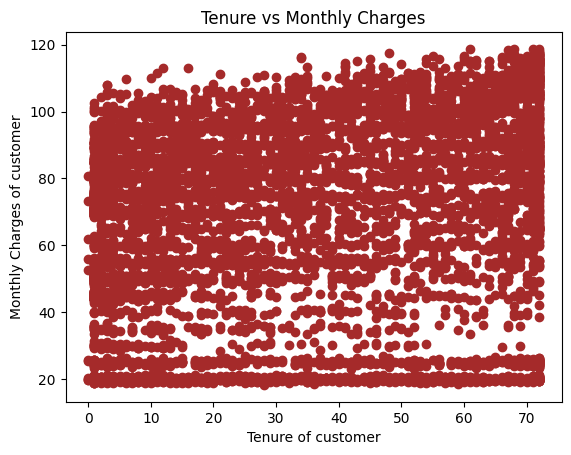

In [29]:
plt.scatter(df["tenure"], df["MonthlyCharges"], color="brown")
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")

**Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.**

Text(0, 0.5, 'Tenure')

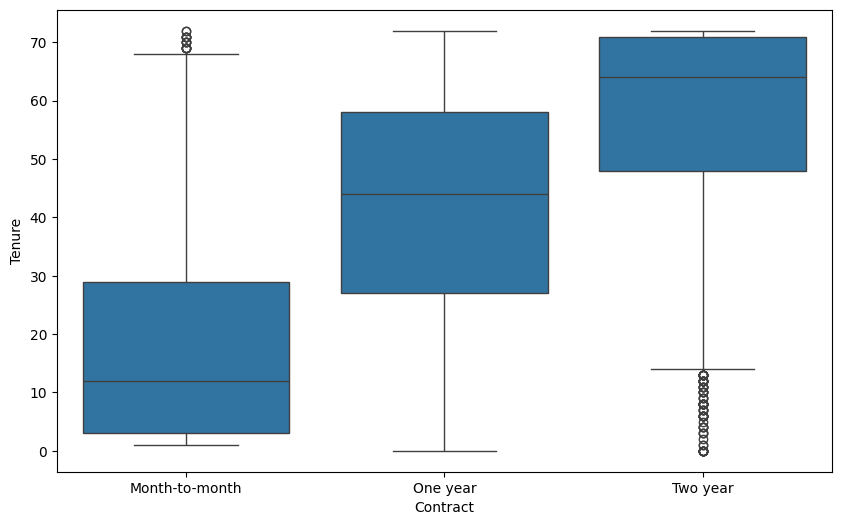

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Contract", y="tenure", data = df)
plt.xlabel("Contract")
plt.ylabel("Tenure")

**Linear Regression:** 

**Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’:** 

a. Divide the dataset into train and test sets in 70:30 ratio.

b. Build the model on train set and predict the values on test set

c. After predicting the values, find the root mean square error

d. Find out the error in prediction & store the result in ‘error’

e. Find the r2 score.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [63]:
x = df[["tenure"]] # independent variable
y = df["MonthlyCharges"] # dependent variable

**Train test split 70:30**

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [65]:
x_train # train questions

,tenure
1695,54
1095,1
3889,13
3667,24
2902,6
...,...
3772,1
5191,23
5226,12
5390,12


In [66]:
x_test # test questions

,tenure
185,1
2715,41
3825,52
1807,1
132,67
...,...
5522,1
6377,1
5500,60
2392,20


In [67]:
y_train # train answer

1695    70.70
1095    80.55
3889    19.30
3667    96.55
2902    74.10
        ...  
3772    95.00
5191    91.10
5226    21.15
5390    99.45
860     19.80
Name: MonthlyCharges, Length: 4930, dtype: float64

In [68]:
y_test # test answer

185     24.80
2715    25.25
3825    19.35
1807    76.35
132     50.55
        ...  
5522    70.15
6377    44.65
5500    60.50
2392    90.70
6705    51.10
Name: MonthlyCharges, Length: 2113, dtype: float64

**Build model**

In [69]:
lr=LinearRegression()

In [70]:
lr.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


**Predict values**

In [71]:
y_pred = lr.predict(x_test)

In [72]:
y_pred

array([55.10659011, 67.43520921, 70.82557946, ..., 73.29130328,
       60.96268418, 61.57911514], shape=(2113,))

**Root mean square value (RMSE)**

In [74]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

np.float64(29.07936015646814)

**Error in prediction, store in "error"**

In [76]:
error = y_pred-y_test
print("Error: ", error)

Error:  185     30.306590
2715    42.185209
3825    51.475579
1807   -21.243410
132     24.898812
          ...    
5522   -15.043410
6377    10.456590
5500    12.791303
2392   -29.737316
6705    10.479115
Name: MonthlyCharges, Length: 2113, dtype: float64


In [79]:
r2_score(y_test,y_pred)

0.05856035027031614

**Insight:**
Both the high RMSE and the very low R2 score consistently point to the fact that the current model is not performing well in predicting the target variable. 

It's struggling to capture the underlying patterns in data. which can be expected since this model was built using only a single independent variable in the dataset to predict target variable.

Uusually the aim is for a much higher R2 score, especially if your goal is to make accurate predictions. 

A low RMSE, because it is the unit by which model prediction deviates from actual values. 

The model RMSE of 29.08 means that, on average the model's predictions are off by about 29.08 units on this target scale of 0-100. This is a relativel high error.

**Logistic regression:**


**Build a simple logistic regression model where dependent variable is 'Churn' and independent variable is 'MonthlyCharges':**


a. Divide the dataset in 65:35 ratio,


b. Build the model on train set and predict  the values on test set.


c. Build the confusion matrix and get the accuracy score.

d. Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’

e. Divide the dataset in 80:20 ratio

f. Build the model on train set and predict the values on test set

g. Build the confusion matrix and get the accuracy score


In [84]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x = df[["MonthlyCharges"]] # independent variable
y = df["Churn"] # dependent variable

In [89]:
x

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70
...,...
7038,84.80
7039,103.20
7040,29.60
7041,74.40


In [99]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

<Axes: ylabel='MonthlyCharges'>

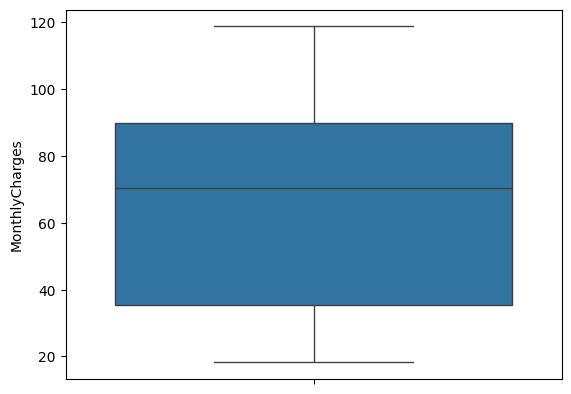

In [91]:
# check for outliers 
# no outliers
sns.boxplot(df["MonthlyCharges"])

In [100]:
# label encoding for "Churn" dependent variable
from sklearn.preprocessing import LabelEncoder

In [101]:
le = LabelEncoder()

In [102]:
df["Churn"] = le.fit_transform(df["Churn"])
df["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [103]:
y = df["Churn"]

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=42)

In [ ]:
x_train # train question

,MonthlyCharges
3143,72.80
192,19.75
6251,19.25
1126,74.65
2689,116.75
...,...
3772,95.00
5191,91.10
5226,21.15
5390,99.45


In [ ]:
x_test # test question

,MonthlyCharges
185,24.80
2715,25.25
3825,19.35
1807,76.35
132,50.55
...,...
5940,85.85
1788,19.60
5101,106.65
6549,56.25


In [ ]:
y_train # train answer

3143    0
192     0
6251    0
1126    1
2689    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 4577, dtype: int64

In [ ]:
y_test # test answer

185     1
2715    0
3825    0
1807    1
132     0
       ..
5940    0
1788    0
5101    0
6549    1
528     0
Name: Churn, Length: 2466, dtype: int64

In [109]:
log = LogisticRegression()

In [110]:
log.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [111]:
y_pred = log.predict(x_test)

In [112]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(2466,))

**Model Evaluation:**

Accuracy score and Confusion matrix

In [113]:
accuracy_score(y_test,y_pred)

0.7287104622871047

In [114]:
confusion_matrix(y_test,y_pred)

array([[1797,    0],
       [ 669,    0]])

**Insights:**

This model has 0.7287 accuracy score. It means that the model correctly predicted the churn status for approximately 72.87% of the customers in my test set.

That is out of all the predictions the model made, about 70% of them correct, whether it is predicting customer would churn or would not churn.

Model Confusion Matrix: [[1797,    0],[ 669,    0]]: It means

1797 (True Negative): The model correctly predicted that 1797 customers would not churn.

0 (False Positive): The model incorrectly predicted that 0 customers would churn, but they actually did not churn ( no Type I error).

669 (False Negative): The model incorrectly predicted that 669 customers would not churn, but they actually did churn (Type II error).

0 (True Positive): The model correctly predicted that 0 customers would churn.

Note: Model has a major flaw of never predicting that customer will churn.
True Postive = 0, it did not correctly identify a single churning customer
False Positive = 0, It didn't incorrectly identify a single non-churning customer as churning.

That is model is just predicting " No Churn" for every single customer, and the hight accuracy score  (72.87%) is misleading because it is achieved by simply correctly predicting the majority class ( non churners). it failed at its primary objective to identify who will churn.

**Multiple Linear regression model with  Churn as dependent variable and MonthlyCharges, tenure as independent variables**

In [115]:
x = df[["MonthlyCharges", "tenure"]] # independent variables
y = df["Churn"] # dependent variable

In [117]:
x

,MonthlyCharges,tenure
0,29.85,1
1,56.95,34
2,53.85,2
3,42.30,45
4,70.70,2
...,...,...
7038,84.80,24
7039,103.20,72
7040,29.60,11
7041,74.40,4


In [118]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

**train test split 80:20**

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [120]:
x_train

,MonthlyCharges,tenure
2142,64.85,21
1623,97.20,54
6074,23.45,1
1362,70.20,4
6754,61.90,0
...,...,...
3772,95.00,1
5191,91.10,23
5226,21.15,12
5390,99.45,12


In [121]:
x_test

,MonthlyCharges,tenure
185,24.80,1
2715,25.25,41
3825,19.35,52
1807,76.35,1
132,50.55,67
...,...,...
6366,68.30,64
315,110.05,51
2439,19.90,17
5002,43.95,69


In [122]:
y_train

2142    0
1623    0
6074    1
1362    1
6754    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5634, dtype: int64

In [123]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int64

In [124]:
logreg=LogisticRegression()

In [125]:
logreg.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [126]:
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1409,))

**Model Evaluation: Accuracy Score and Confusion matrix** 

In [127]:
acc= accuracy_score(y_test,y_pred)
print("Accuracy score: ",acc)

Accuracy score:  0.7977288857345636


In [128]:
confusion_matrix(y_test,y_pred)

array([[944,  92],
       [193, 180]])

**Insights:**

This model has 0.7977 accuracy score. It means that the model correctly predicted the churn status for approximately 79.77% of the customers in my test set.

That is out of all the predictions the model made, nearly 80% of them correct, whether it is predicting customer would churn or would not churn.

Model Confusion Matrix: [[944,  92],[193, 180]]: It means

944 (True Negative): The model correctly predicted that 944 customers would not churn.

92 (False Positive): The model incorrectly predicted that 92 customers would churn, but they actually did not churn (Type I error).

193 (False Negative): The model incorrectly predicted that 193 customers would not churn, but they actually did churn (Type II error).

180 (True Positive): The model correctly predicted that 180 customers would churn.
